# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Import the data as a pandas dataframe

In [2]:
path_1 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df = pd.read_csv(path_1.joinpath('train_timeseries.csv'), index_col='date', parse_dates=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19300680 entries, 2000-01-01 to 2016-12-31
Data columns (total 20 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   PRECTOT      float64
 2   PS           float64
 3   QV2M         float64
 4   T2M          float64
 5   T2MDEW       float64
 6   T2MWET       float64
 7   T2M_MAX      float64
 8   T2M_MIN      float64
 9   T2M_RANGE    float64
 10  TS           float64
 11  WS10M        float64
 12  WS10M_MAX    float64
 13  WS10M_MIN    float64
 14  WS10M_RANGE  float64
 15  WS50M        float64
 16  WS50M_MAX    float64
 17  WS50M_MIN    float64
 18  WS50M_RANGE  float64
 19  score        float64
dtypes: float64(19), int64(1)
memory usage: 3.0 GB


In [3]:
df_cut = df.iloc[0:366,:]

## First Year (2000) is imported as 'df_cut'

### Starting with some first explorations of the dataset. I will first do some plots of the columns.

# Description of Columns:

**fips** = US county FIPS code. see: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_0136 \
**date** = Date \
**PRECTOT** = Precipitation (mm day-1) \
**PS** = Surface Pressure (kPa) \
**QV2M** = Specific Humidity at 2 Meters (g/kg) \
**T2M** = Temperature at 2 Meters (C) \
**T2MDEW** = Dew/Frost Point at 2 Meters (C) \
**T2MWET** = Wet Bulb Temperature at 2 Meters (C) \
**T2M_MAX** = Maximum Temperature at 2 Meters (C) \
**T2M_MIN** = Minimum Temperature at 2 Meters (C) \
**T2M_RANGE** = Temperature Range at 2 Meters (C) \
**TS** = Earth Skin Temperature (C) \
**WS10M** = Wind Speed at 10 Meters (m/s) \
**WS10M_MAX** = Maximum Wind Speed at 10 Meters (m/s) \
**WS10M_MIN** = Minimum Wind Speed at 10 Meters (m/s) \
**WS10M_RANGE** = Wind Speed Range at 10 Meters (m/s) \
**WS50M** = Wind Speed at 50 Meters (m/s) \
**WS50M_MAX** = Maximum Wind Speed at 50 Meters (m/s) \
**WS50M_MIN** = Minimum Wind Speed at 50 Meters (m/s) \
**WS50M_RANGE** = Wind Speed Range at 50 Meters (m/s) \
**score** = Measure of drought ranging from 0 (no drought) to 5 (D4, see description).

In [47]:
df_cut.isnull().sum()

fips             0
PRECTOT          0
PS               0
QV2M             0
T2M              0
T2MDEW           0
T2MWET           0
T2M_MAX          0
T2M_MIN          0
T2M_RANGE        0
TS               0
WS10M            0
WS10M_MAX        0
WS10M_MIN        0
WS10M_RANGE      0
WS50M            0
WS50M_MAX        0
WS50M_MIN        0
WS50M_RANGE      0
score          314
T2M_MEAN         0
dtype: int64

## Exploration of the correlation

In [4]:
corr = df_cut.corr()

<AxesSubplot:>

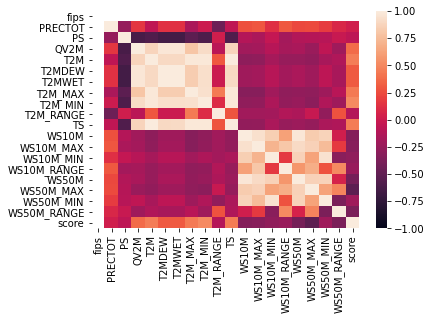

In [9]:
sns.heatmap(corr, vmin=-1, vmax=1)

## Creating new mean columns for T2M Range, WS10 Range and WS50 Range

In [ ]:
df_cut['T2M_MEAN'] = df_cut['T2M_RANGE'].mean()
df_cut['WS10_MEAN'] = df_cut['WS10_RANGE'].mean()

# Build Linear Regression Model

### Split the Dataset into the train and test set

In [10]:
from sklearn.model_selection import train_test_split

In [22]:
df_cut_first_pred = df_cut[['PRECTOT', 'PS', 'QV2M', 'T2M', 'TS', 'WS10M', 'WS50M']]

In [24]:
df_cut_first_pred.head()

,PRECTOT,PS,QV2M,T2M,TS,WS10M,WS50M
date,,,,,,,
2000-01-01,0.22,100.51,9.65,14.74,14.65,2.20,4.85
2000-01-02,0.20,100.55,10.42,16.69,16.60,2.52,5.33
2000-01-03,3.65,100.15,11.76,18.49,18.41,4.03,7.53
2000-01-04,15.95,100.29,6.42,11.40,11.31,3.84,6.73
2000-01-05,0.00,101.15,2.95,3.86,2.65,1.60,2.94


In [28]:
X = df_cut_first_pred.drop(['PRECTOT'], axis = 1).values

In [30]:
X.shape

(366, 6)

In [31]:
y = df_cut_first_pred['PRECTOT'].values

In [32]:
y.shape

(366,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

## Train the model

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.predict(X_test)

array([10.48446158,  1.40534541,  3.35856614, -0.8016916 ,  0.15708223,
       -0.96817783,  6.24500519,  2.31065243,  2.07865284,  1.07931167,
       -1.38327534,  1.09565562,  6.9449875 , -0.38023218,  3.34408907,
        3.67276669, -0.41351089,  0.01249797,  0.35107271,  5.20813532,
        5.25357152,  5.47801654,  0.43576367, -1.62662742, -4.640004  ,
        5.43906623,  0.20633267,  5.35169812,  4.15331774,  7.12128806,
       -3.14838634,  4.82116102,  4.28923127, -2.64285802, -0.26833945,
        1.41125509,  5.40825239, -1.44257985,  0.02716346, -2.27881871,
        1.90321385,  5.95368324,  6.37148877,  5.21854292,  0.78951632,
        1.51411918, -0.96816657, -0.57828751,  0.3630736 ,  1.45173504,
        6.53407689,  0.29870606,  5.9804498 ,  7.84128201,  6.36053108,
        6.84469266, -0.07652186,  5.10678106,  0.3552443 ,  1.93773066,
        1.8533338 ,  3.42623557,  5.07004588,  0.51480353,  2.13446839,
       -1.83375457,  2.00506227, -2.70610487, 10.86522938,  3.95

In [38]:
model.score(X_test, y_test)

0.2502687377393855

## Second model without droping any columns

In [48]:
X2 = df_cut.drop(['PRECTOT', 'score'], axis=1).values
y2 = df_cut['PRECTOT'].values
print(X2.shape)
print(y2.shape)

(366, 19)
(366,)


In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=21)

In [50]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [51]:
model2.score(X_test2, y_test2)

0.32576416137824205

# abstract

#### Both of the linear regression models don't do very well in predicting the data. So I will try some different models.

# ARIMA

<AxesSubplot:xlabel='date'>

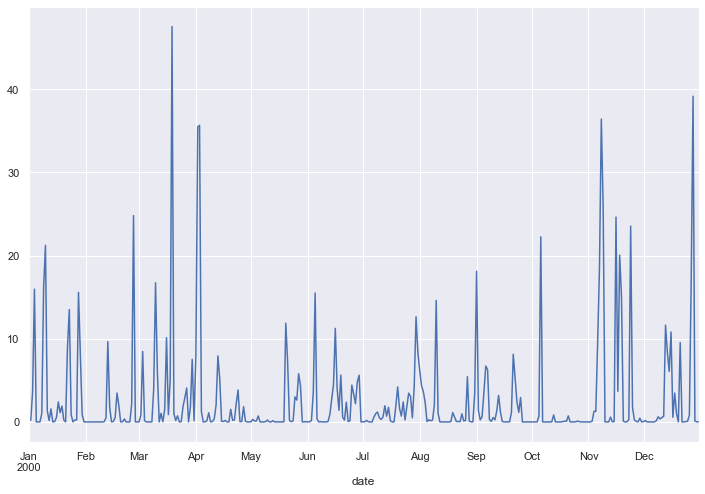

In [55]:
df_cut['PRECTOT'].plot()

In [56]:
from statsmodels.tsa.arima_model import ARIMA
import itertools
import warnings

In [60]:
# Running ARIMA with random numbers
model_arima = ARIMA(X_train2, order=(2,0,0))
model_arima_fit = model_arima.fit(disp=-1)

# Save the predictions
#fcast1 = model_arima_fit.forecast()

ValueError: endog is required to have ndim 1 but has ndim 2